In [5]:
##Presentation charts
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plant2_test_data = pd.read_csv('../Data/Test_Plant2_added_features.csv')
plant2_train_data = pd.read_csv('../Data/Train_Plant2_added_features.csv')
plant1_test_data = pd.read_csv('../Data/Test_Plant1_added_features.csv')
plant1_train_data = pd.read_csv('../Data/Train_Plant1_added_features.csv')


plant2_test_data['DATE_TIME'] = pd.to_datetime(plant2_test_data['DATE_TIME'])
plant2_train_data['DATE_TIME'] = pd.to_datetime(plant2_train_data['DATE_TIME'])
plant1_test_data['DATE_TIME'] = pd.to_datetime(plant1_test_data['DATE_TIME'])
plant1_train_data['DATE_TIME'] = pd.to_datetime(plant1_train_data['DATE_TIME'])


plant2_train_data["DAY_OF_YEAR"] = plant2_train_data['DATE_TIME'].dt.dayofyear
plant2_train_data_grouped = plant2_train_data.groupby(['DAY_OF_YEAR'])[['DC_POWER']].agg({'sum'}).reset_index()
plant2_test_data["DAY_OF_YEAR"] = plant2_test_data['DATE_TIME'].dt.dayofyear
plant2_test_data_grouped = plant2_test_data.groupby(['DAY_OF_YEAR'])[['DC_POWER']].agg({'sum'}).reset_index()

plant1_train_data["DAY_OF_YEAR"] = plant1_train_data['DATE_TIME'].dt.dayofyear
plant1_train_data_grouped = plant1_train_data.groupby(['DAY_OF_YEAR'])[['DC_POWER']].agg({'sum'}).reset_index()
plant1_test_data["DAY_OF_YEAR"] = plant1_test_data['DATE_TIME'].dt.dayofyear
plant1_test_data_grouped = plant1_test_data.groupby(['DAY_OF_YEAR'])[['DC_POWER']].agg({'sum'}).reset_index()

In [147]:
train_mean_plant2 = np.repeat(np.mean(plant2_train_data_grouped['DC_POWER']), 8)
train_mean_plant1 = np.repeat(np.mean(plant1_train_data_grouped['DC_POWER']), 8)

Rolling_mean_plant1 = [
7.19E+06,
6.83E+06,
6.02E+06,
5.35E+06,
5.95E+06,
6.39E+06,
6.67E+06,
5.99E+06
]

Rolling_mean_plant2 = [
5.44E+05,
5.17E+05,
4.30E+05,
3.83E+05,
4.03E+05,
4.57E+05,
4.57E+05,
4.66E+05,

]


XGBRegressor_plant1 = [6.88E+06,
7.02E+06,
6.84E+06,
6.17E+06,
6.58E+06,
6.72E+06,
7.08E+06,
6.52E+06

]

XGBRegressor_plant2 = [5.47E+05,
5.01E+05,
4.15E+05,
4.10E+05,
5.09E+05,
5.23E+05,
4.95E+05,
4.86E+05,
]

SVR_plant1 = [
1.979500e+02,
1.979500e+02,
1.979500e+02,
1.979500e+02,
6.873598e+06,
5.748259e+06,
5.481281e+06,
5.044069e+06
    ]


SVR_plant2 = [
522478.498884,
371238.23824,
323315.544653,
387870.884356,
429416.391819,
477121.087261,
387649.399706,
453458.638964
    ]

linear_plant2 = [547289.8783,
475413.5961,
388800.2039,
410535.7879,
476915.7309,
513485.8021,
471319.2371,
471052.4215
]

linear_plant1 = [7.18E+06,
6.48E+06,
5.88E+06,
5.49E+06,
6.27E+06,
6.21E+06,
6.68E+06,
6.06E+06

]


RF_plant_2 = [
   519517.559642,
479125.969286,
450419.196099,
450667.489504,
462197.870685,
518962.580603,
524179.728576,
488056.642407
]
RF_plant_1 = [
7.09E+06,
7.43E+06,
7.31E+06,
6.62E+06,
6.75E+06,
7.03E+06,
7.21E+06,
7.11E+06
]

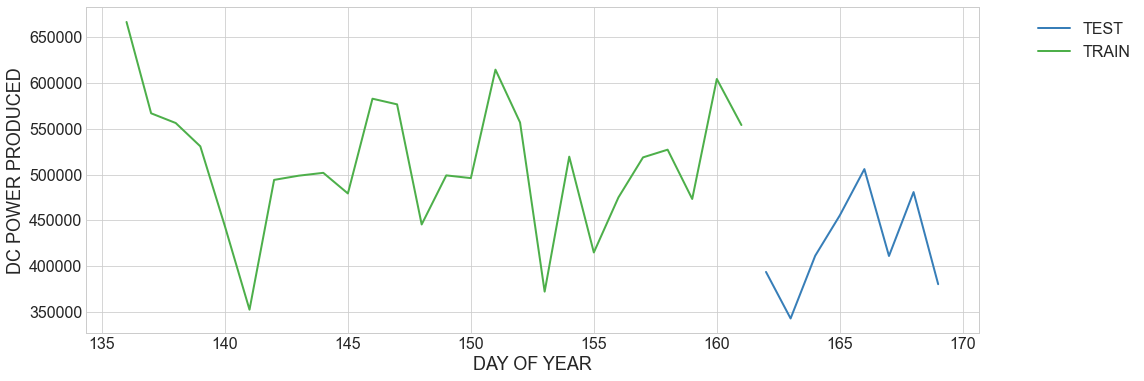

In [93]:
#PLANT 2 Train and test
palette = plt.get_cmap('Set1')
import matplotlib.style as style
style.use('seaborn-whitegrid')
plt.figure(figsize=(16,6))
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], plant2_test_data_grouped['DC_POWER'], marker='', color=palette(1), linewidth=2, alpha=1.0, label='TEST')
plt.plot(plant2_train_data_grouped['DAY_OF_YEAR'], plant2_train_data_grouped['DC_POWER'], marker='', color=palette(2), linewidth=2, alpha=1.0, label='TRAIN')
#plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], XGBRegressor_plant2, marker='', linestyle='dashdot', color=palette(10), linewidth=2, alpha=1, label='XGBRegressor')
#plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], Rolling_mean_plant2, marker='', linestyle='dashed', color=palette(3), linewidth=2, alpha=1, label='3d rolling mean (baseline)')
#plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], SVR_plant2, marker='', linestyle='dotted', color=palette(2), linewidth=3, alpha=1, label='SVR')
#plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], train_mean_plant2, marker='', linestyle='dashed', color=palette(0), linewidth=2, alpha=0.9, label='Train mean')
plt.tick_params(axis='both', which='major', labelsize=16)
# Add legend
plt.legend(ncol=1, prop={'size': 16}, bbox_to_anchor=(1.05, 1), loc='upper left')
# Add titles
#plt.title("Train and test", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("DAY OF YEAR", fontsize=18)
plt.ylabel("DC POWER PRODUCED", fontsize=18)
plt.savefig('PLANT_2_train.png', bbox_inches='tight')



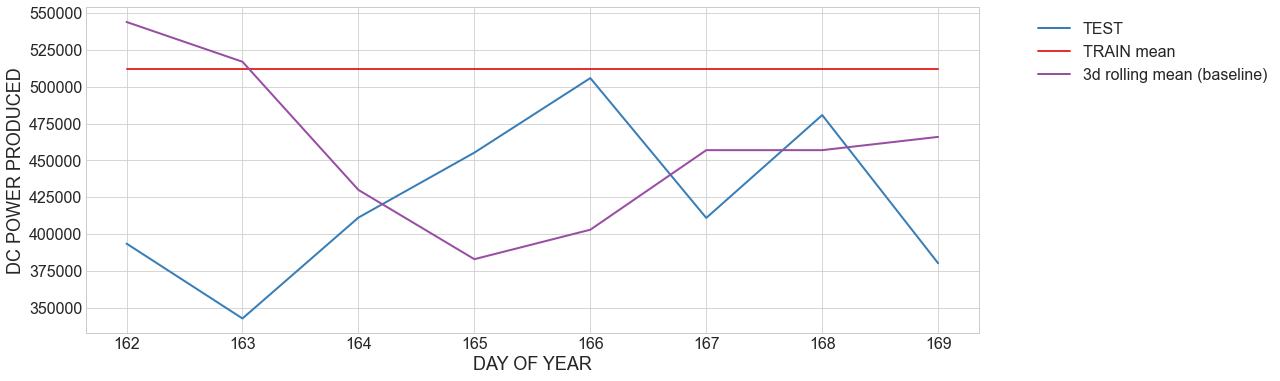

In [122]:
#PLANT 2 BASELINE
palette = plt.get_cmap('Set1')
import matplotlib.style as style
style.use('seaborn-whitegrid')
plt.figure(figsize=(16,6))
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], plant2_test_data_grouped['DC_POWER'], marker='', color=palette(1), linewidth=2, alpha=1.0, label='TEST')
#plt.plot(plant2_train_data_grouped['DAY_OF_YEAR'], plant2_train_data_grouped['DC_POWER'], marker='', color=palette(2), linewidth=2, alpha=1.0, label='TRAIN')
#plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], XGBRegressor_plant2, marker='', linestyle='dashdot', color=palette(10), linewidth=2, alpha=1, label='XGBRegressor')
#plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], SVR_plant2, marker='', linestyle='dotted', color=palette(2), linewidth=3, alpha=1, label='SVR')
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], train_mean_plant2, marker='',  color=palette(0), linewidth=2, alpha=0.9, label='TRAIN mean')
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], Rolling_mean_plant2, marker='',  color=palette(3), linewidth=2, alpha=1, label='3d rolling mean (baseline)')

plt.tick_params(axis='both', which='major', labelsize=16)
# Add legend
plt.legend(ncol=1, prop={'size': 16}, bbox_to_anchor=(1.05, 1), loc='upper left')
# Add titles
#plt.title("Train and test", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("DAY OF YEAR", fontsize=18)
plt.ylabel("DC POWER PRODUCED", fontsize=18)
plt.savefig('PLANT_2_baseline.png', bbox_inches='tight')

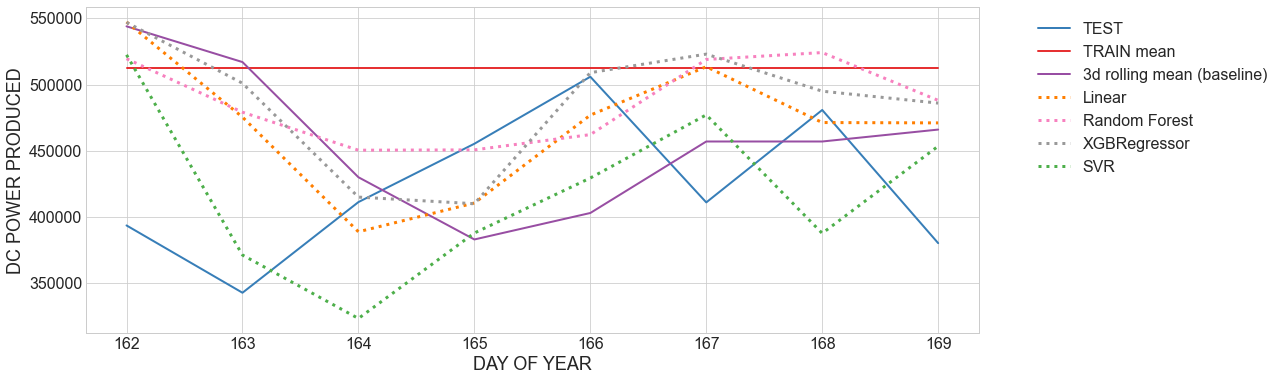

In [148]:
#PLANT 2 WITH PREDICTIONS
palette = plt.get_cmap('Set1')
import matplotlib.style as style
style.use('seaborn-whitegrid')
plt.figure(figsize=(16,6))
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], plant2_test_data_grouped['DC_POWER'], marker='', color=palette(1), linewidth=2, alpha=1.0, label='TEST')
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], train_mean_plant2, marker='',  color=palette(0), linewidth=2, alpha=0.9, label='TRAIN mean')
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], Rolling_mean_plant2, marker='', color=palette(3), linewidth=2, alpha=1, label='3d rolling mean (baseline)')


#plt.plot(plant2_train_data_grouped['DAY_OF_YEAR'], plant2_train_data_grouped['DC_POWER'], marker='', color=palette(2), linewidth=2, alpha=1.0, label='TRAIN')
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], linear_plant2, marker='', linestyle='dotted', color=palette(4), linewidth=3, alpha=1, label='Linear')

plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], RF_plant_2, marker='', linestyle='dotted', color=palette(7), linewidth=3, alpha=1, label='Random Forest')
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], XGBRegressor_plant2, marker='', linestyle='dotted', color=palette(10), linewidth=3, alpha=1, label='XGBRegressor')
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], SVR_plant2, marker='', linestyle='dotted', color=palette(2), linewidth=3, alpha=1, label='SVR')

plt.tick_params(axis='both', which='major', labelsize=16)
# Add legend
plt.legend(ncol=1, prop={'size': 16}, bbox_to_anchor=(1.05, 1), loc='upper left')
# Add titles
#plt.title("Train and test", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("DAY OF YEAR", fontsize=18)
plt.ylabel("DC POWER PRODUCED", fontsize=18)
plt.savefig('PLANT_2_predictions.png', bbox_inches='tight')


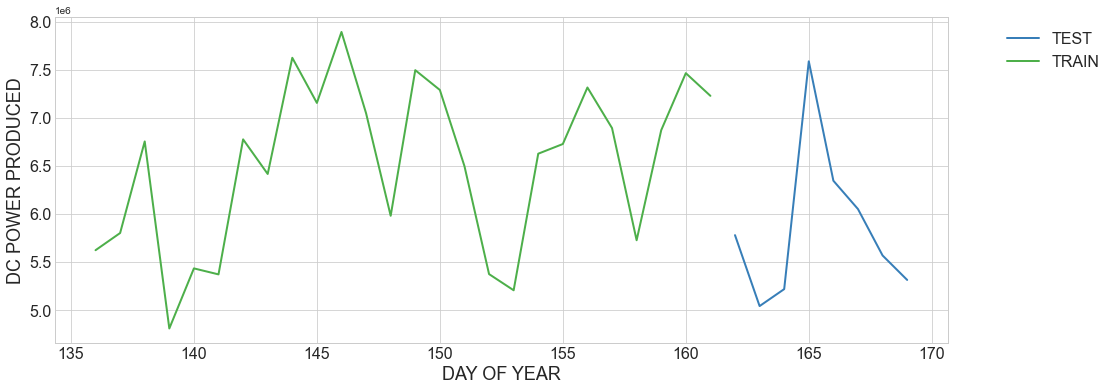

In [149]:
#PLANT 1 Train and test
palette = plt.get_cmap('Set1')
import matplotlib.style as style
style.use('seaborn-whitegrid')
plt.figure(figsize=(16,6))
plt.plot(plant1_test_data_grouped['DAY_OF_YEAR'], plant1_test_data_grouped['DC_POWER'], marker='', color=palette(1), linewidth=2, alpha=1.0, label='TEST')
plt.plot(plant1_train_data_grouped['DAY_OF_YEAR'], plant1_train_data_grouped['DC_POWER'], marker='', color=palette(2), linewidth=2, alpha=1.0, label='TRAIN')
#plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], XGBRegressor_plant2, marker='', linestyle='dashdot', color=palette(10), linewidth=2, alpha=1, label='XGBRegressor')
#plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], Rolling_mean_plant2, marker='', linestyle='dashed', color=palette(3), linewidth=2, alpha=1, label='3d rolling mean (baseline)')
#plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], SVR_plant2, marker='', linestyle='dotted', color=palette(2), linewidth=3, alpha=1, label='SVR')
#plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], train_mean_plant2, marker='', linestyle='dashed', color=palette(0), linewidth=2, alpha=0.9, label='Train mean')
plt.tick_params(axis='both', which='major', labelsize=16)
# Add legend
plt.legend(ncol=1, prop={'size': 16}, bbox_to_anchor=(1.05, 1), loc='upper left')
# Add titles
#plt.title("Train and test", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("DAY OF YEAR", fontsize=18)
plt.ylabel("DC POWER PRODUCED", fontsize=18)
plt.savefig('PLANT_2_train.png', bbox_inches='tight')


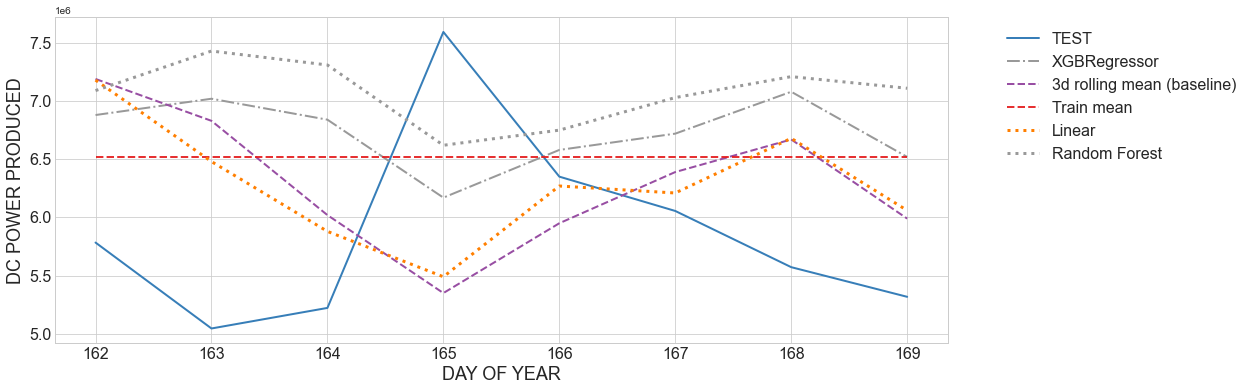

In [151]:

#PLANT 1 WITH PREDICTIONS
palette = plt.get_cmap('Set1')
import matplotlib.style as style
style.use('seaborn-whitegrid')
plt.figure(figsize=(16,6))
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], plant1_test_data_grouped['DC_POWER'], marker='', color=palette(1), linewidth=2, alpha=1.0, label='TEST')
#plt.plot(plant2_train_data_grouped['DAY_OF_YEAR'], plant2_train_data_grouped['DC_POWER'], marker='', color=palette(2), linewidth=2, alpha=1.0, label='TRAIN')
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], XGBRegressor_plant1, marker='', linestyle='dashdot', color=palette(10), linewidth=2, alpha=1, label='XGBRegressor')
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], Rolling_mean_plant1, marker='', linestyle='dashed', color=palette(3), linewidth=2, alpha=1, label='3d rolling mean (baseline)')
#plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], SVR_plant1, marker='', linestyle='dotted', color=palette(2), linewidth=3, alpha=1, label='SVR')
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], train_mean_plant1, marker='', linestyle='dashed', color=palette(0), linewidth=2, alpha=0.9, label='Train mean')
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], linear_plant1, marker='', linestyle='dotted', color=palette(4), linewidth=3, alpha=1, label='Linear')
plt.plot(plant2_test_data_grouped['DAY_OF_YEAR'], RF_plant_1, marker='', linestyle='dotted', color=palette(8), linewidth=3, alpha=1, label='Random Forest')

plt.tick_params(axis='both', which='major', labelsize=16)
# Add legend
plt.legend(ncol=1, prop={'size': 16}, bbox_to_anchor=(1.05, 1), loc='upper left')
# Add titles
#plt.title("Train and test", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("DAY OF YEAR", fontsize=18)
plt.ylabel("DC POWER PRODUCED", fontsize=18)
plt.savefig('PLANT_1_predictions.png', bbox_inches='tight')



In [48]:
np.repeat(np.mean(plant2_train_data_grouped['DC_POWER']), 8)

sum    512323.669225
sum    512323.669225
sum    512323.669225
sum    512323.669225
sum    512323.669225
sum    512323.669225
sum    512323.669225
sum    512323.669225
dtype: float64